## Librerias


In [2]:
# librerias de arquitectura
from arquitectura import  *
import procesamiento
from torch.utils.data import TensorDataset, DataLoader
import torch
import torch.nn as nn
import pickle
import matplotlib.pyplot as plt
import numpy as np

## Lectura y procesamiento dataset


In [4]:
with open('./td_ztf_stamp_17_06_20.pkl', 'rb') as f:
        full_data = pickle.load(f)
print(full_data.keys())

dict_keys(['Train', 'Validation', 'Test'])


In [5]:
data_train=procesamiento.recorte(full_data["Train"]["images"],21)
data_val=procesamiento.recorte(full_data["Validation"]["images"],21)
data_test=procesamiento.recorte(full_data["Test"]["images"],21)

In [6]:
data_tuples = [(x, y) for (x, y) in data_test] # Separamos el dataset en X, y
X_test = torch.stack([t[0] for t in data_tuples])

data_tuples = [(x, y) for (x, y) in data_train] # Separamos el dataset en X, y
X_train = torch.stack([t[0] for t in data_tuples])

data_tuples = [(x, y) for (x, y) in data_val] # Separamos el dataset en X, y
X_val = torch.stack([t[0] for t in data_tuples])

## Carga de modelos

In [3]:
model128 = AutoEncoderV3() # we do not specify pretrained=True, i.e. do not load default weights
model128.load_state_dict(torch.load('modelo_entrenadov3.pth'))

model64 = AutoEncoderV4() # we do not specify pretrained=True, i.e. do not load default weights
model64.load_state_dict(torch.load('modelo_entrenadov4.pth'))

<All keys matched successfully>

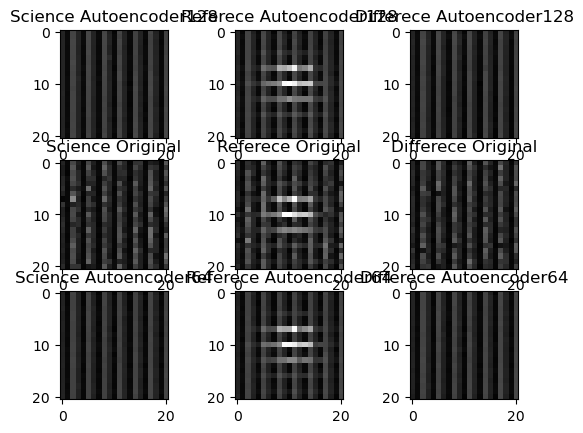

In [8]:
numero=21
result=model128(X_test[numero].reshape(1,3,21,21))
result=result.reshape(3,21,21)
result=result.detach().numpy()

result2=model64(X_test[numero].reshape(1,3,21,21))
result2=result2.reshape(3,21,21)
result2=result2.detach().numpy()

figure, axis = plt.subplots(3, 3)
  
# For Sine Function
axis[0, 0].imshow(result[0], cmap='gray', vmin=0, vmax=1)
axis[0, 0].set_title("Science Autoencoder128")
  
axis[0, 1].imshow(result[1], cmap='gray', vmin=0, vmax=1)
axis[0, 1].set_title("Referece Autoencoder128")
  
axis[0, 2].imshow(result[2], cmap='gray', vmin=0, vmax=1)
axis[0, 2].set_title("Differece Autoencoder128")
  
axis[1, 0].imshow(X_test[numero][0].numpy(), cmap='gray', vmin=0, vmax=1)
axis[1, 0].set_title("Science Original")

axis[1, 1].imshow(X_test[numero][1].numpy(), cmap='gray', vmin=0, vmax=1)
axis[1, 1].set_title("Referece Original")

axis[1, 2].imshow(X_test[numero][2].numpy(), cmap='gray', vmin=0, vmax=1)
axis[1, 2].set_title("Differece Original")

axis[2, 0].imshow(result2[0], cmap='gray', vmin=0, vmax=1)
axis[2, 0].set_title("Science Autoencoder64")

axis[2, 1].imshow(result2[1], cmap='gray', vmin=0, vmax=1)
axis[2, 1].set_title("Referece Autoencoder64")

axis[2, 2].imshow(result2[2], cmap='gray', vmin=0, vmax=1)
axis[2, 2].set_title("Differece Autoencoder64")
# Combine all the operations and display
plt.show()

## Extraccion de caracteristicas

### Extraccion de caracteristicas Enconder 128

In [9]:
from sklearn.preprocessing import StandardScaler

vector_train128 = model128.encoder(X_train).reshape(X_train.shape[0],128).detach().numpy()
scaler = StandardScaler()
scaler.fit(vector_train128)
vector_train128 = scaler.transform(vector_train128)

vector_test128 = model128.encoder(X_test).reshape(X_test.shape[0],128).detach().numpy()
vector_test128 = scaler.transform(vector_test128)

vector_val128 = model128.encoder(X_val).reshape(X_val.shape[0],128).detach().numpy()
Vector_val128 = scaler.transform(vector_val128)

c:\Users\nicoi\anaconda3\envs\int\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


### Extraccion de caracteristicas Encoder64

In [10]:
vector_train64 = model64.encoder(X_train).reshape(X_train.shape[0],64).detach().numpy()
scaler = StandardScaler()
scaler.fit(vector_train64)
vector_train64 = scaler.transform(vector_train64)

vector_test64 = model64.encoder(X_test).reshape(X_test.shape[0],64).detach().numpy()
vector_test64 = scaler.transform(vector_test64)

vector_val64 = model64.encoder(X_val).reshape(X_val.shape[0],64).detach().numpy()
Vector_val64 = scaler.transform(vector_val64)

## Matrix de correlacion

[]

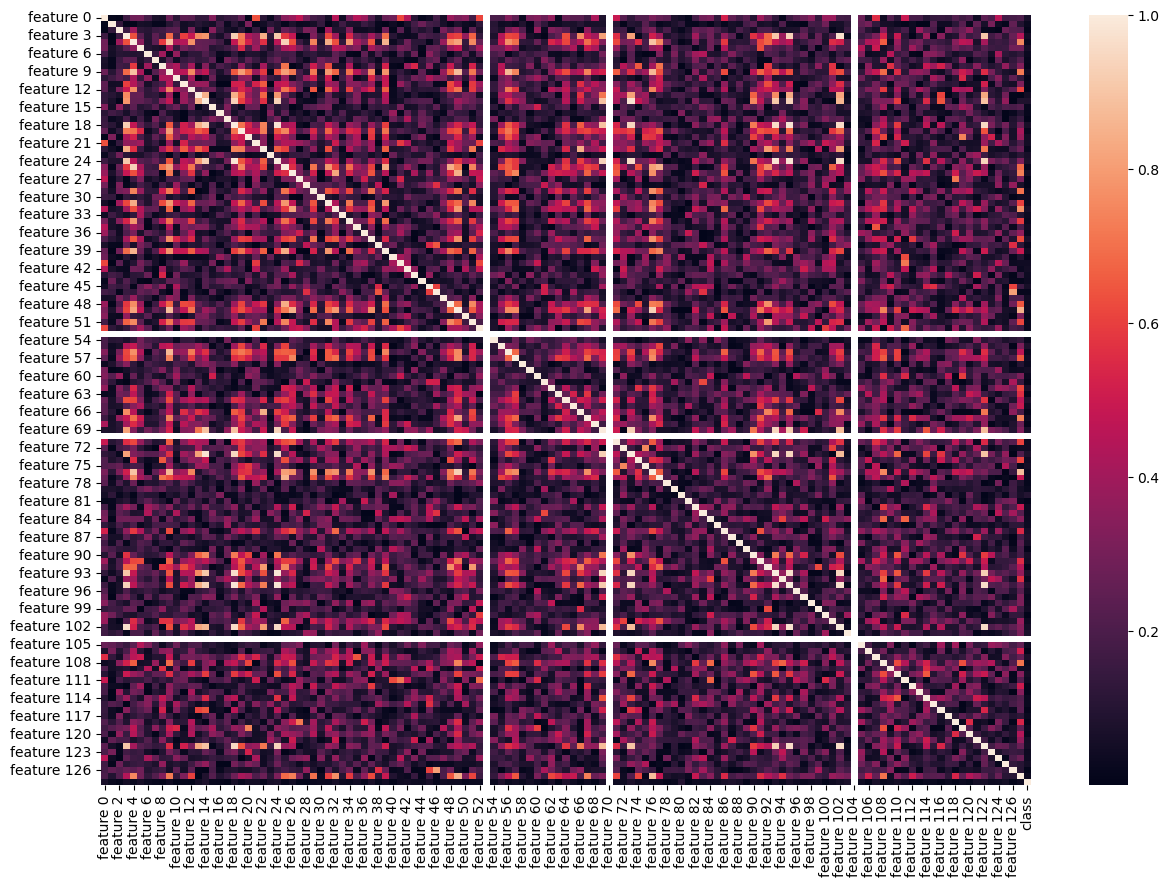

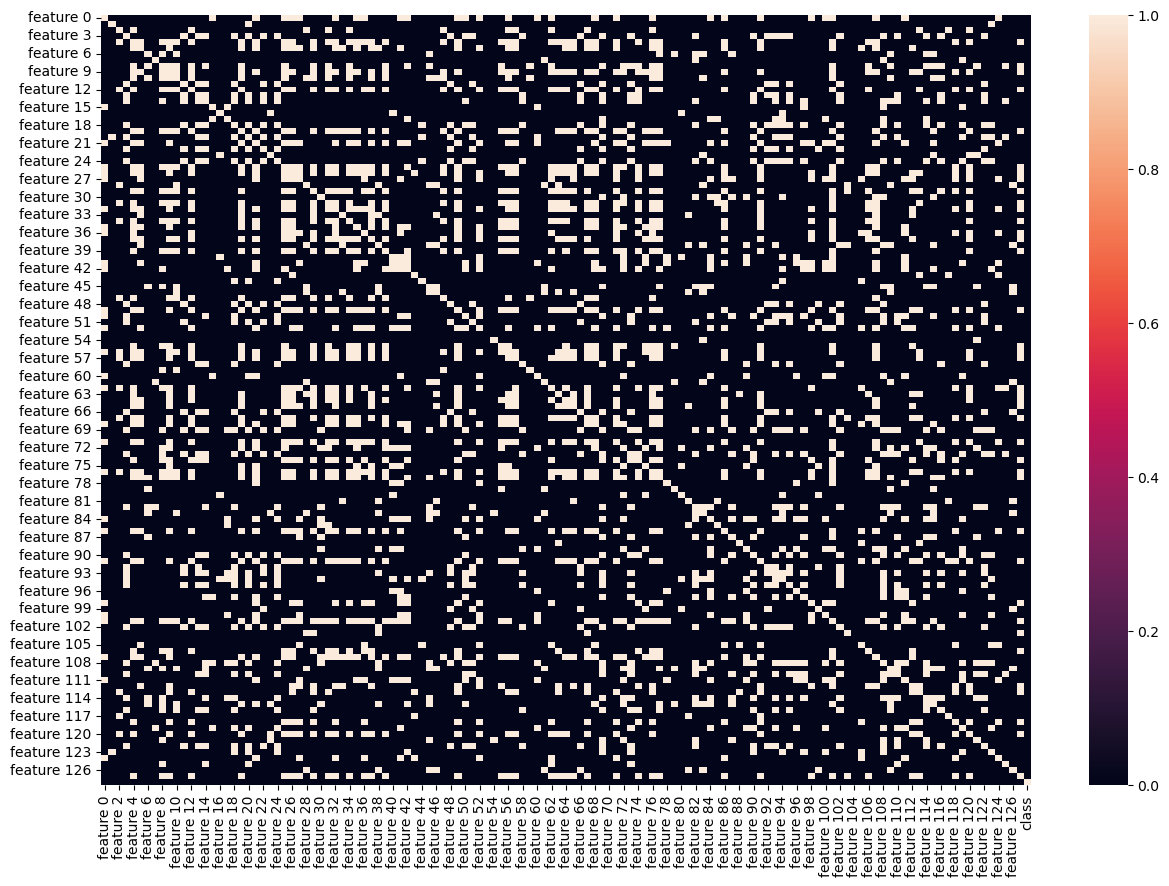

In [11]:
import numpy as np 
import seaborn as sns
import pandas as pd
# duda features y numero


x = vector_test128
y = full_data["Train"]["labels"]
  
df_1 = pd.DataFrame(x,columns=["feature "+str(i) for i in range(128)])
df_2 = pd.DataFrame(y,columns=["class"])
df = pd.concat([df_1, df_2],axis=1)
fig = plt.subplots( figsize=(15, 10))
sns.heatmap(abs(df.corr()))
plt.plot()
fig = plt.subplots( figsize=(15, 10))
sns.heatmap(abs(df.corr()>0.3))
plt.plot()

[]

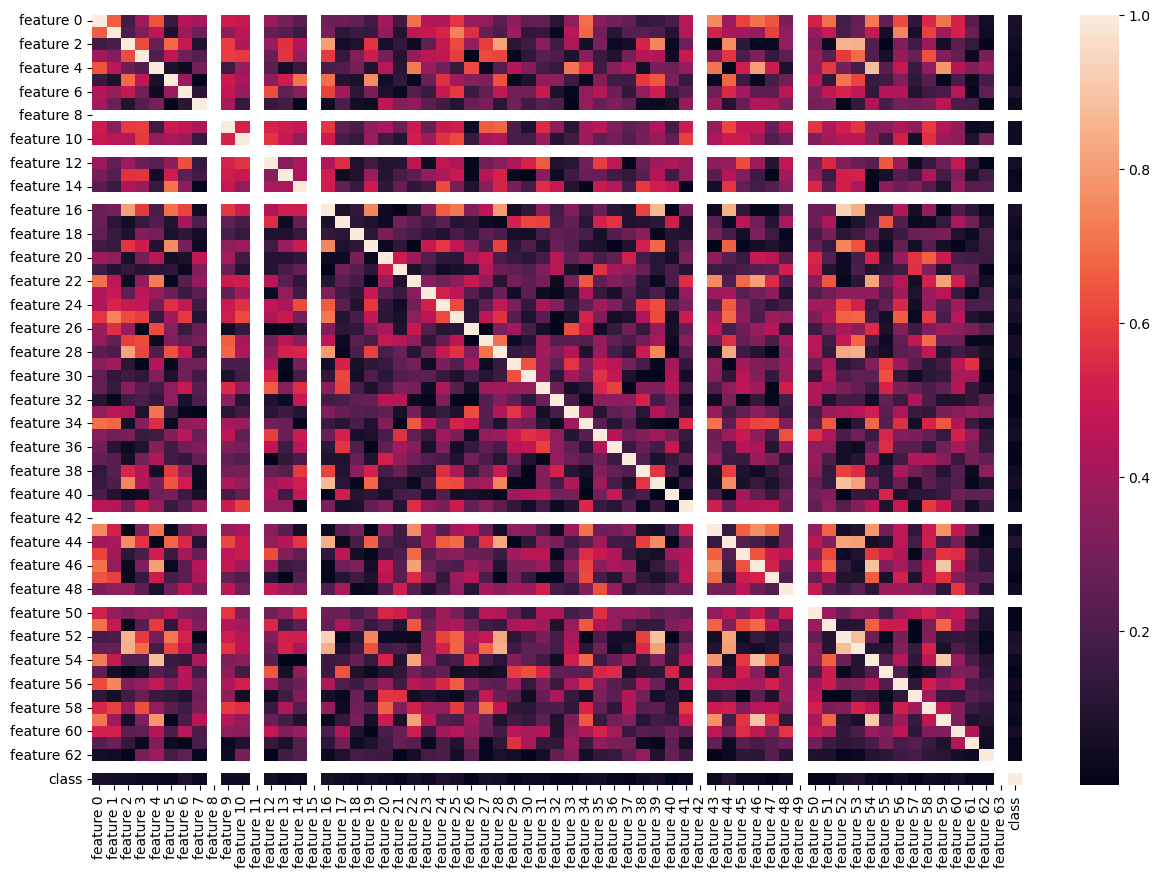

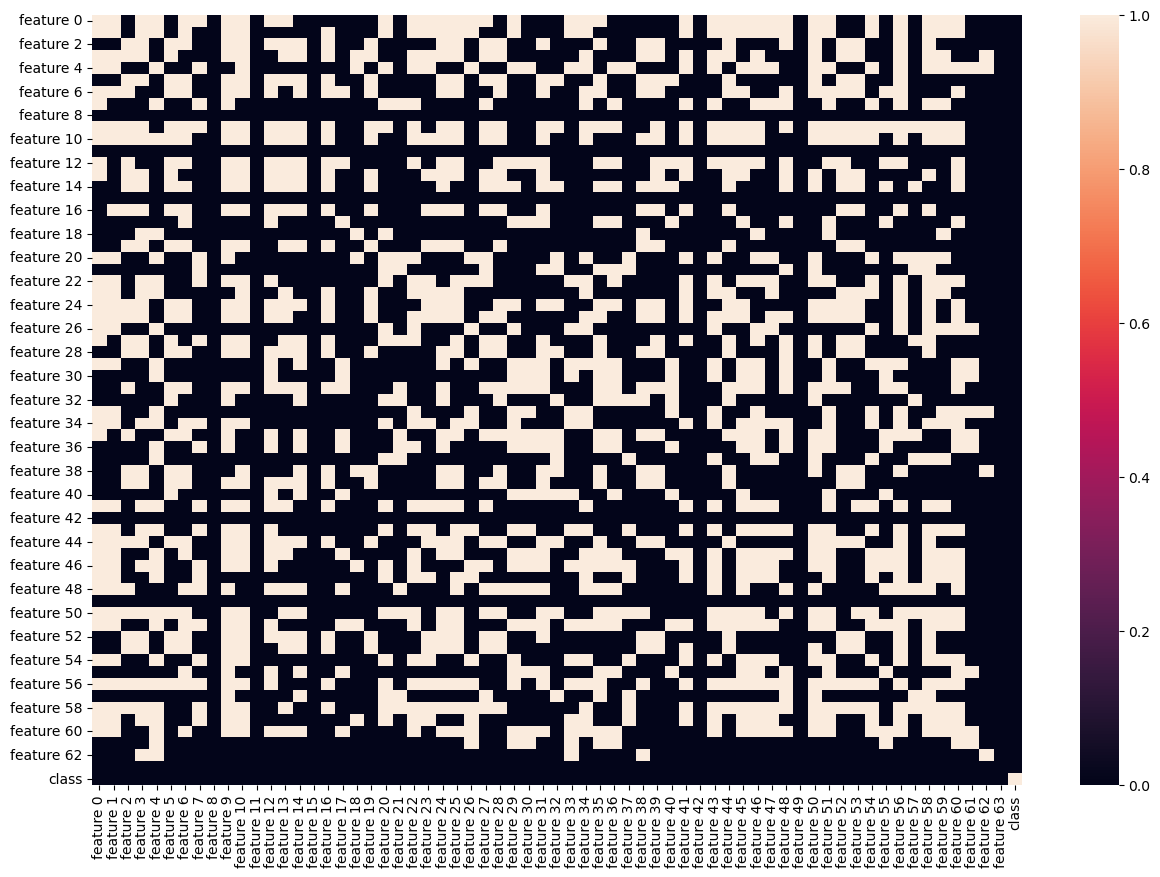

In [12]:
x = vector_test64
y = full_data["Train"]["labels"]
  
df_1 = pd.DataFrame(x,columns=["feature "+str(i) for i in range(64)])
df_2 = pd.DataFrame(y,columns=["class"])
df = pd.concat([df_1, df_2],axis=1)
fig = plt.subplots( figsize=(15, 10))
sns.heatmap(abs(df.corr()))
plt.plot()
fig = plt.subplots( figsize=(15, 10))
sns.heatmap(abs(df.corr()>0.3))
plt.plot()

## Features

### 128

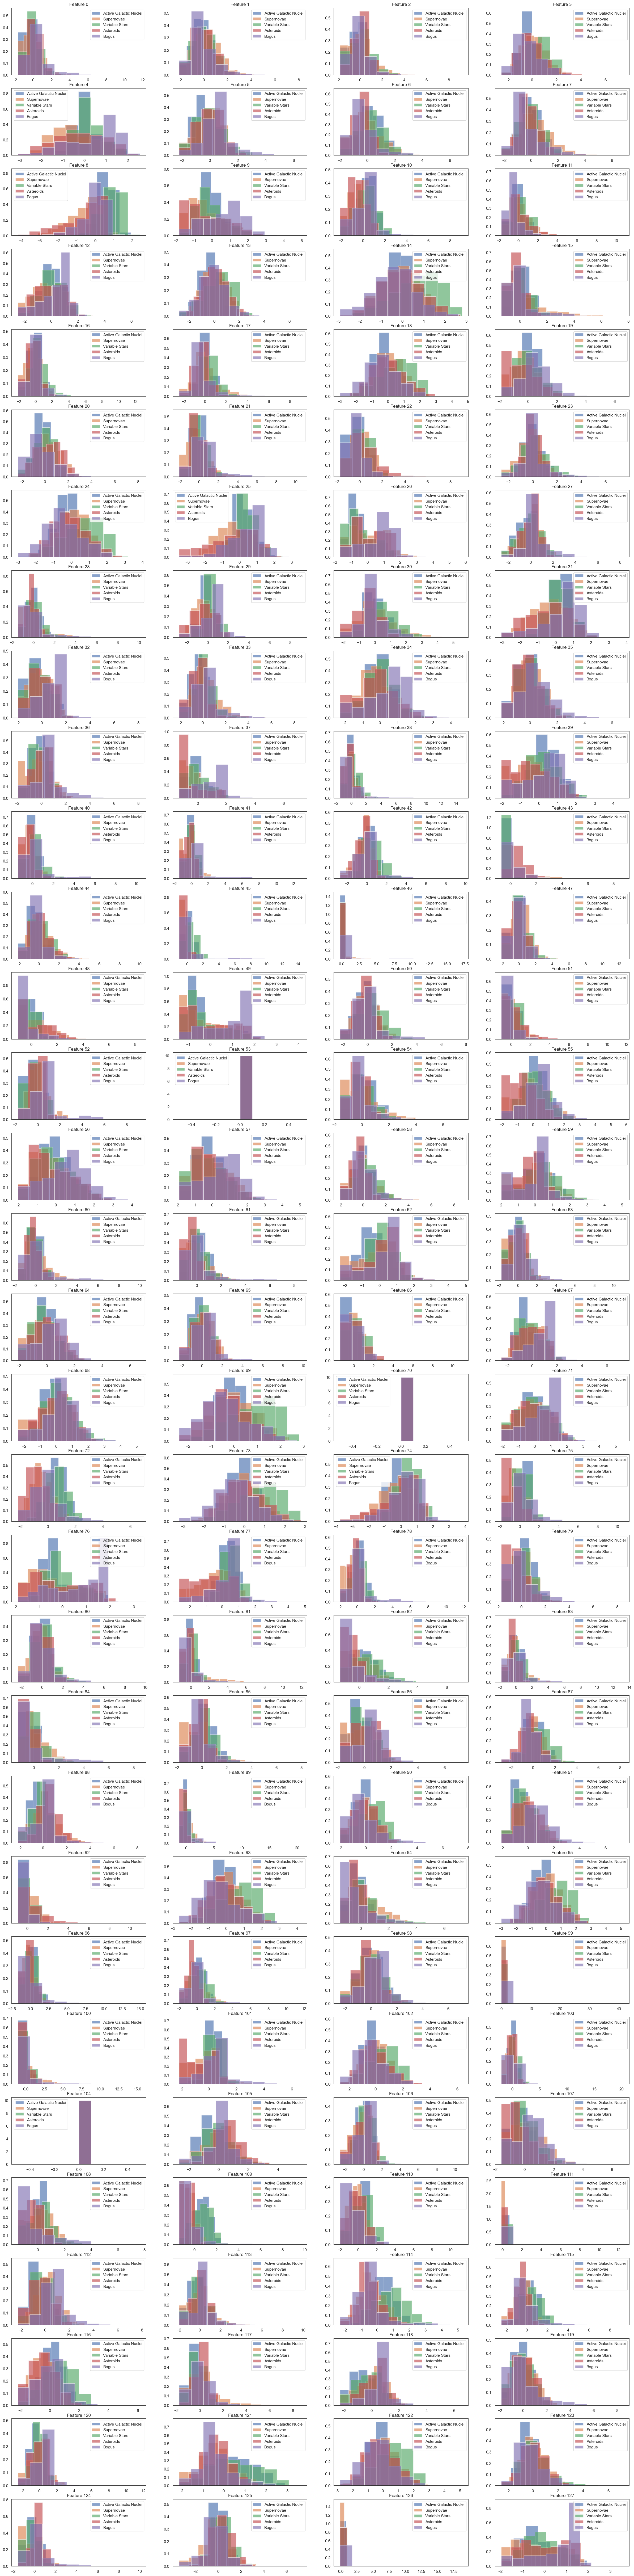

In [24]:
# duda de las clases y su correspondiente numero
class_names =  ["Active Galactic Nuclei","Supernovae","Variable Stars","Asteroids","Bogus"]
fig, axes = plt.subplots(32, 4, figsize=(30, 125))
for pos, clase in enumerate(class_names):
    filtro=full_data["Train"]["labels"]==pos
    feature=0
    for k in range(32):
        for j in range(4):
            axes[k,j].hist(vector_train128[:,feature][filtro], label=clase,alpha = 0.65,density=True)
            axes[k,j].set_title(f"Feature {feature}")
            feature+=1
            
for k in range(32):
    for j in range(4):
        axes[k,j].legend()


### 64

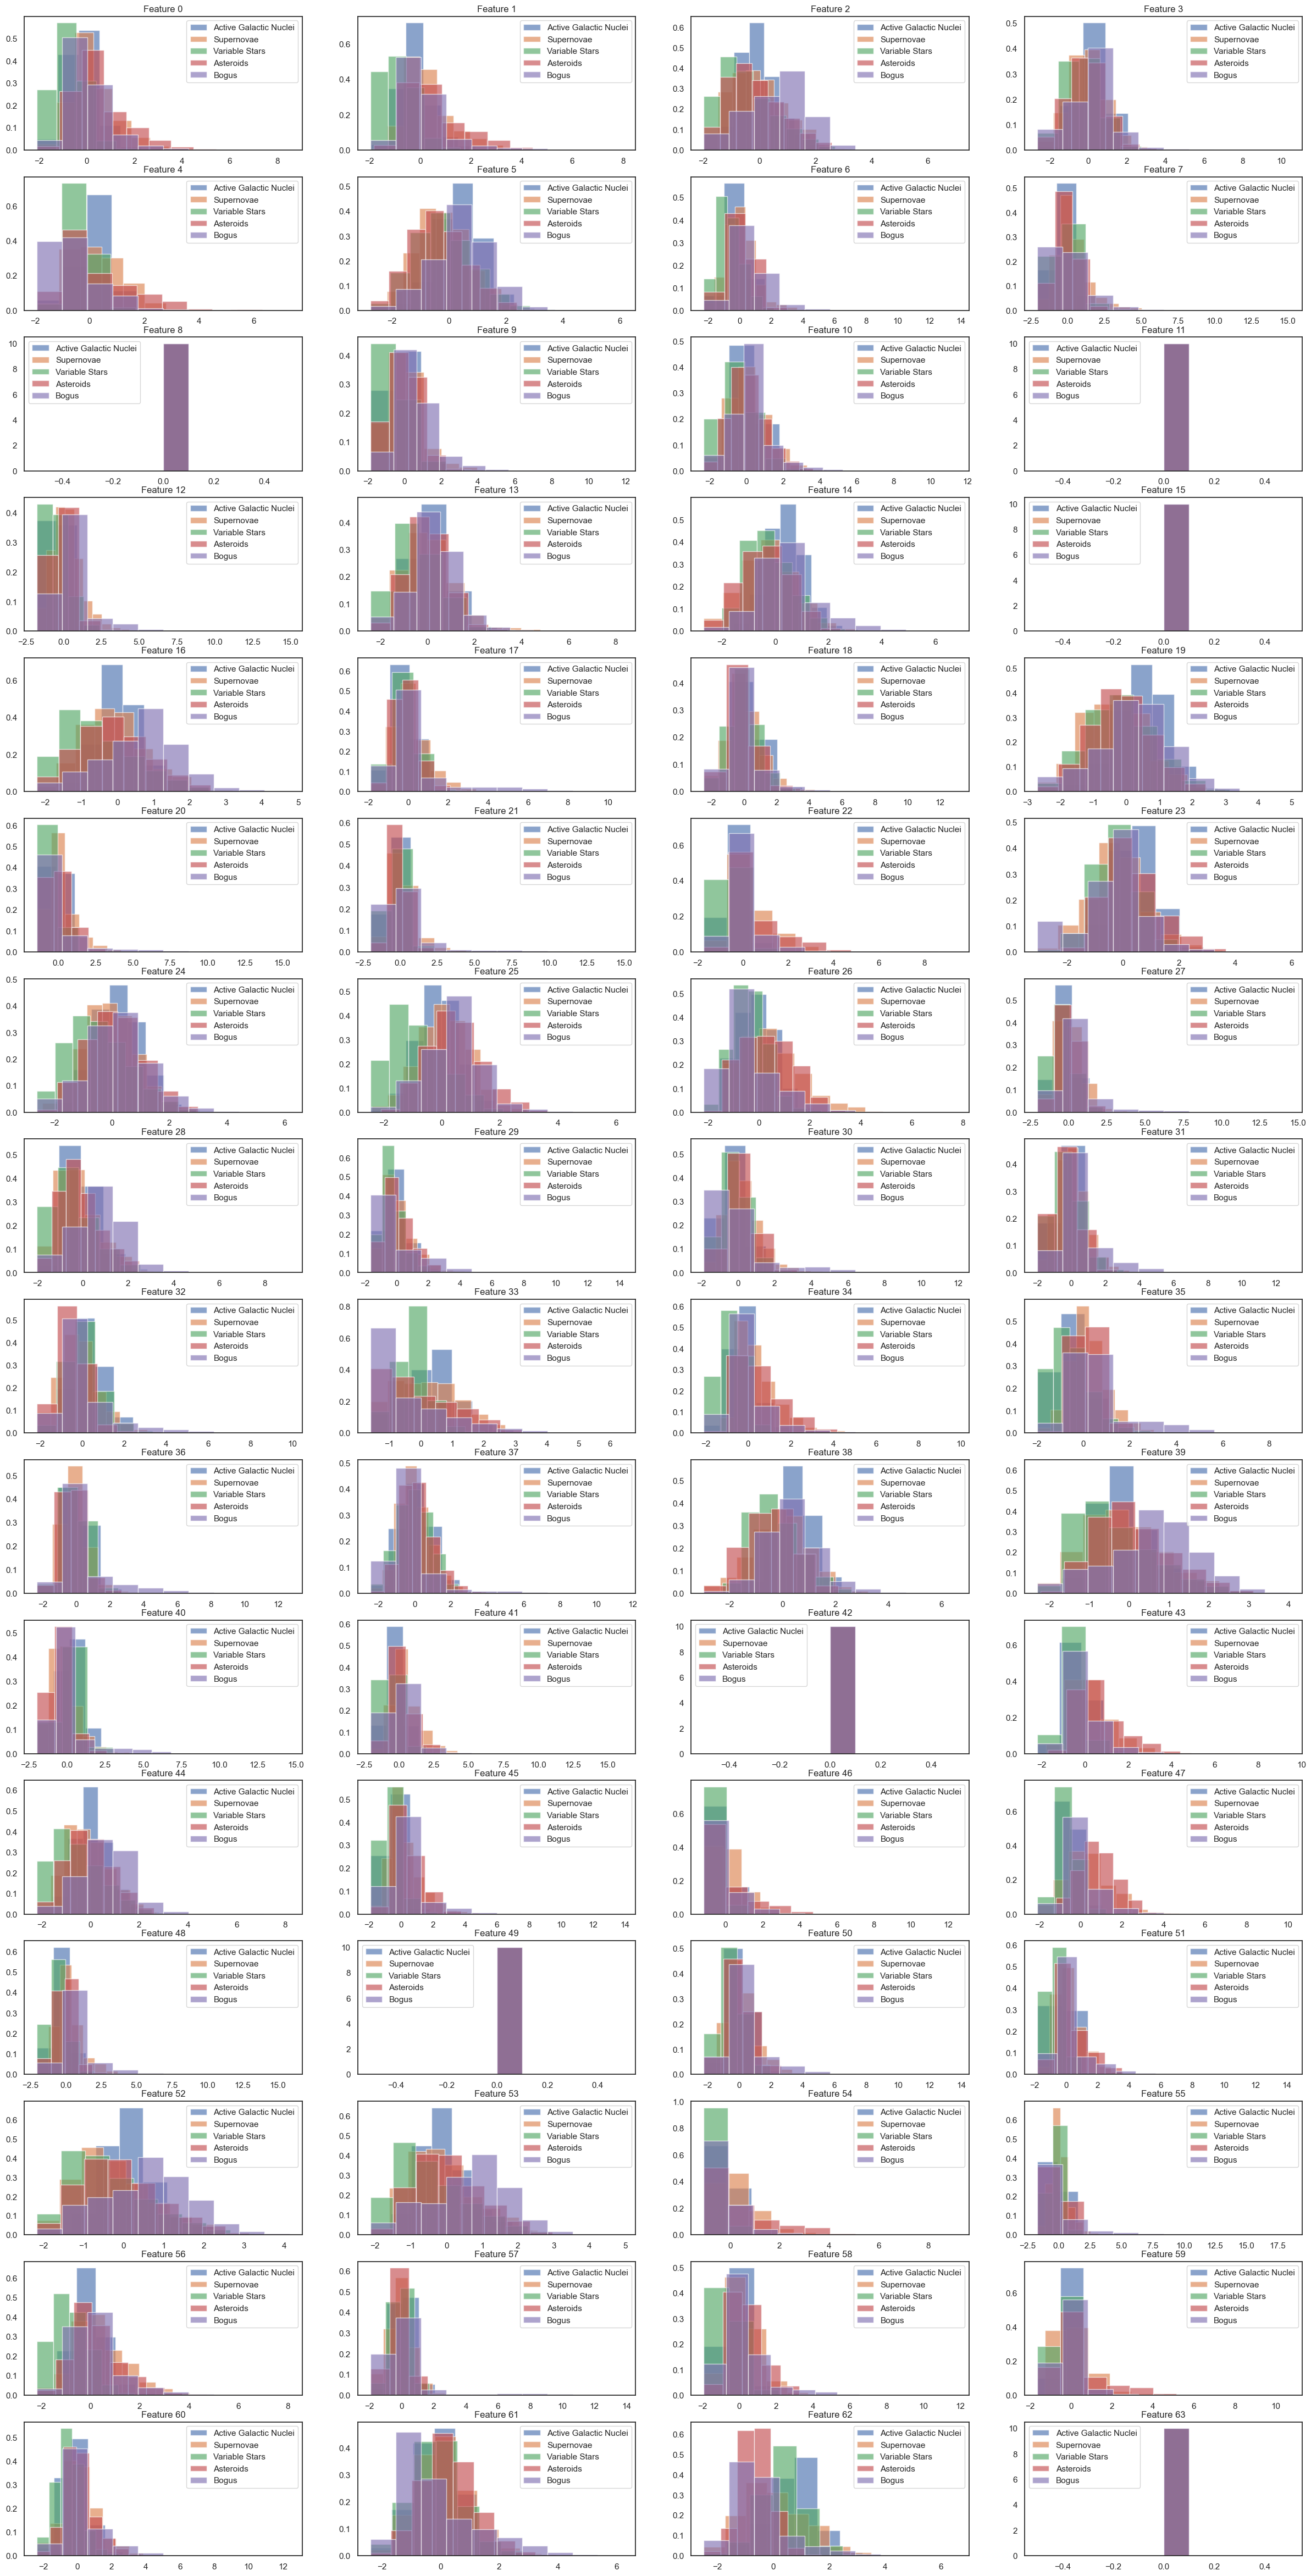

In [25]:
class_names =  ["Active Galactic Nuclei","Supernovae","Variable Stars","Asteroids","Bogus"]
fig, axes = plt.subplots(16, 4, figsize=(30, 60))
for pos, clase in enumerate(class_names):
    filtro=full_data["Train"]["labels"]==pos
    feature=0
    for k in range(16):
        for j in range(4):
            axes[k,j].hist(vector_train64[:,feature][filtro], label=clase,alpha = 0.65,density=True)
            axes[k,j].set_title(f"Feature {feature}")
            feature+=1
            
for k in range(16):
    for j in range(4):
        axes[k,j].legend()

## Reduccion de dimensionalidad

### PCA

#### 128

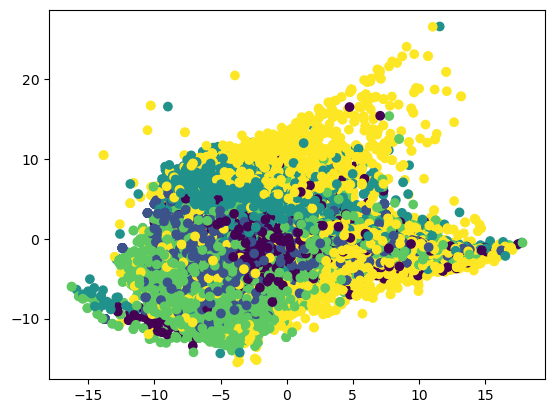

In [18]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
reduced_data = PCA(n_components=2).fit_transform(vector_train128)
kmeans = KMeans(init="k-means++", n_clusters=5)
kmeans.fit(reduced_data)
y_kmeans = kmeans.predict(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=full_data["Train"]["labels"])
plt.show()

#### 64

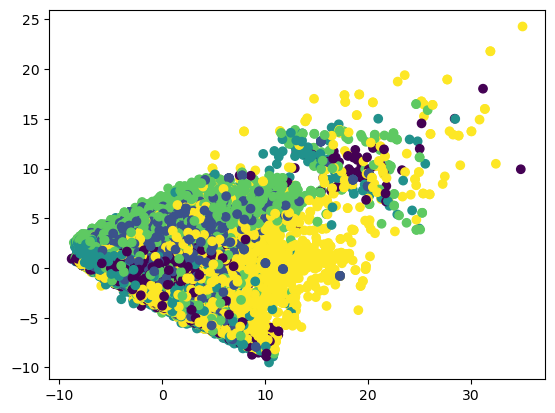

In [16]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
reduced_data = PCA(n_components=2).fit_transform(vector_train64)
kmeans = KMeans(init="k-means++", n_clusters=5)
kmeans.fit(reduced_data)
y_kmeans = kmeans.predict(reduced_data)
plt.scatter(reduced_data[:,0],reduced_data[:,1],c=full_data["Train"]["labels"])
plt.show()

### TSNE

#### 128

In [14]:
from sklearn import manifold
from numpy.random import RandomState
rng = RandomState(0)
t_sne = manifold.TSNE(
    n_components=2,
    learning_rate="auto",
    perplexity=30,
    n_iter=250,
    init="random",
    random_state=rng,
)
v_t_sne = t_sne.fit_transform(vector_train128)

[]

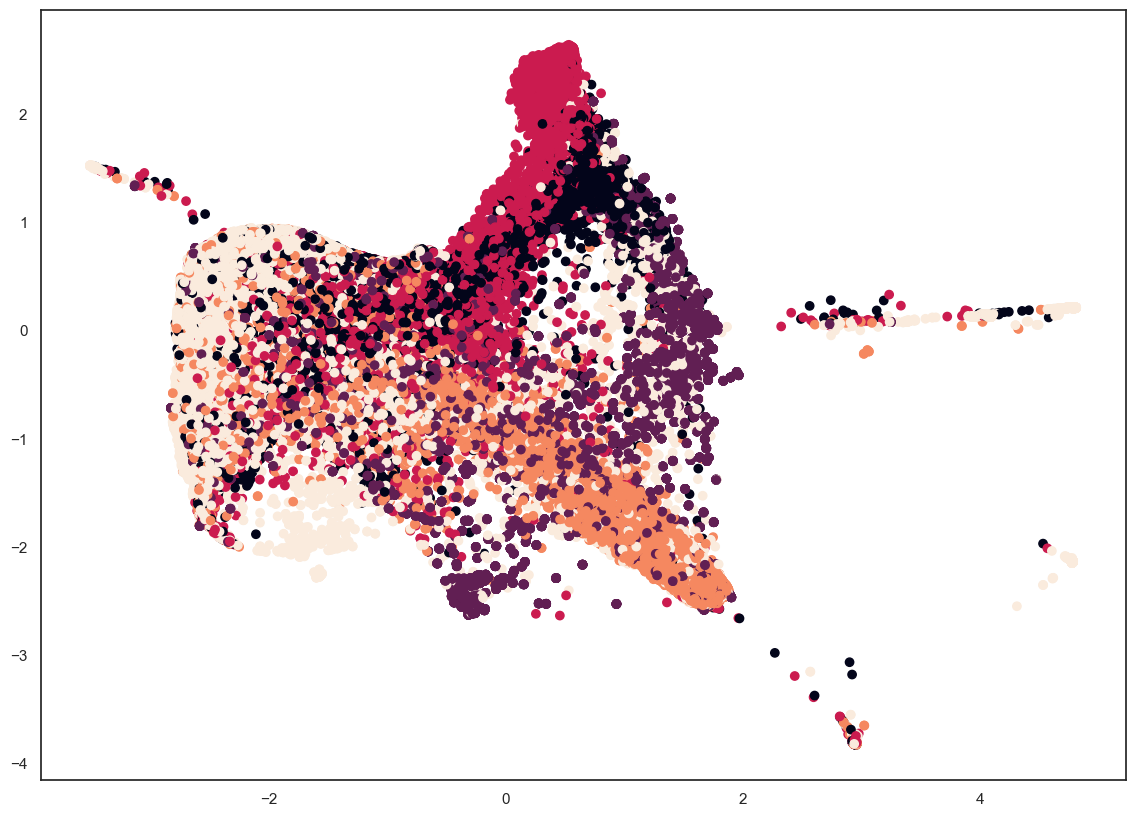

In [19]:
sns.set(style='white', context='notebook', rc={'figure.figsize':(14,10)})

plt.scatter(v_t_sne[:,0],v_t_sne[:,1],c=full_data["Train"]["labels"])
plt.plot()

#### 64

In [20]:
t_sne = manifold.TSNE(
    n_components=2,
    learning_rate="auto",
    perplexity=30,
    n_iter=250,
    init="random",
    random_state=rng,
)
v_t_sne = t_sne.fit_transform(vector_train64)


[]

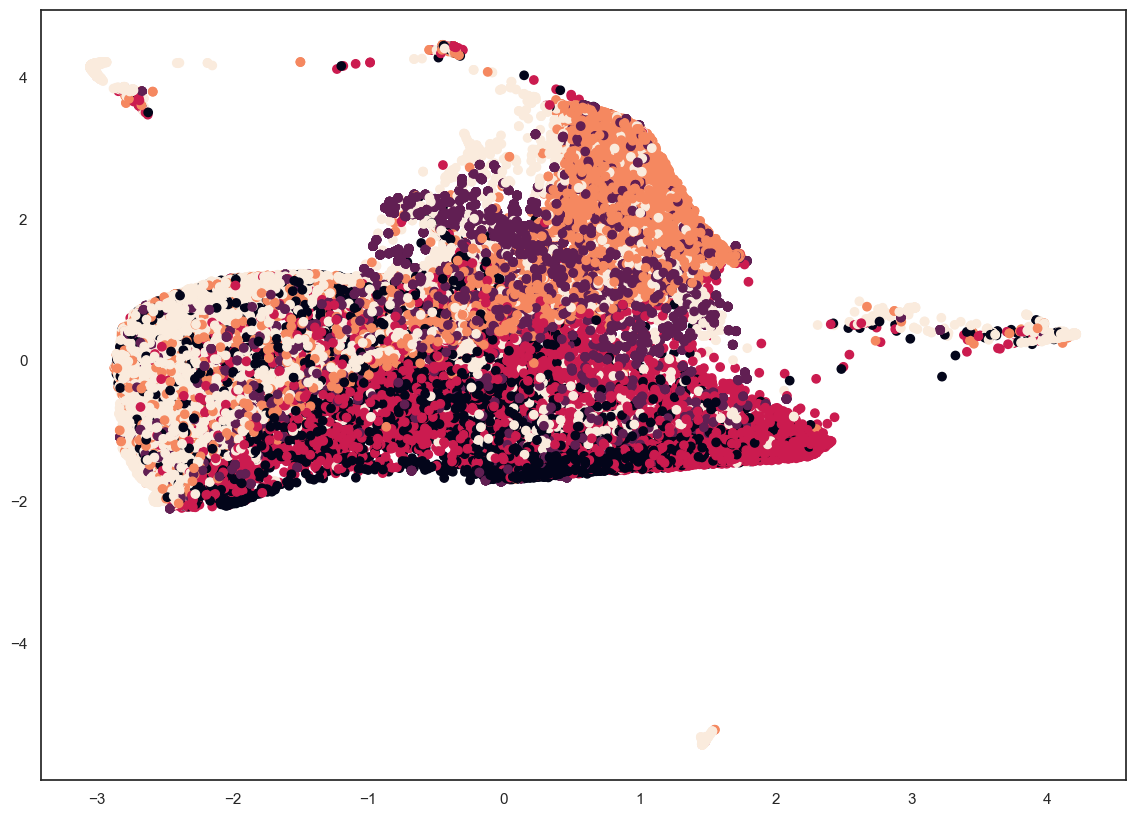

In [21]:
plt.scatter(v_t_sne[:,0],v_t_sne[:,1],c=full_data["Train"]["labels"])
plt.plot()

### UMAP

128

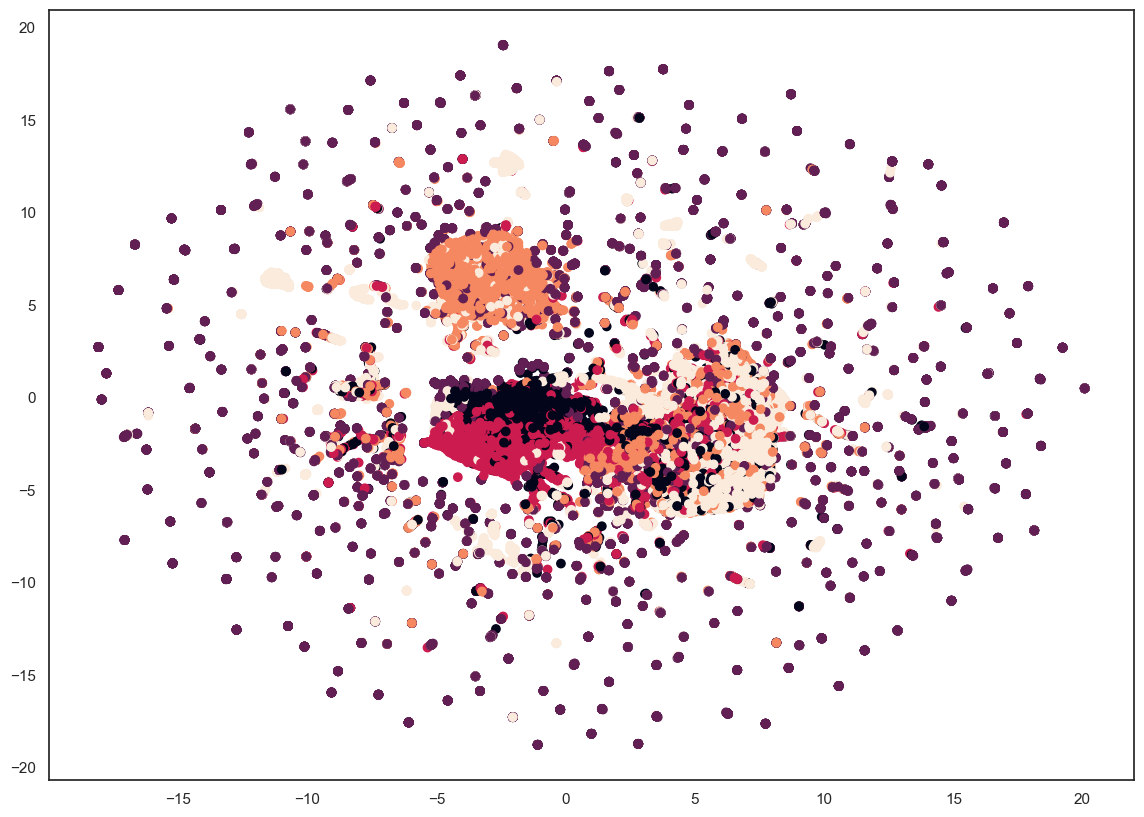

In [22]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(vector_train128)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=full_data["Train"]["labels"])

#### 64

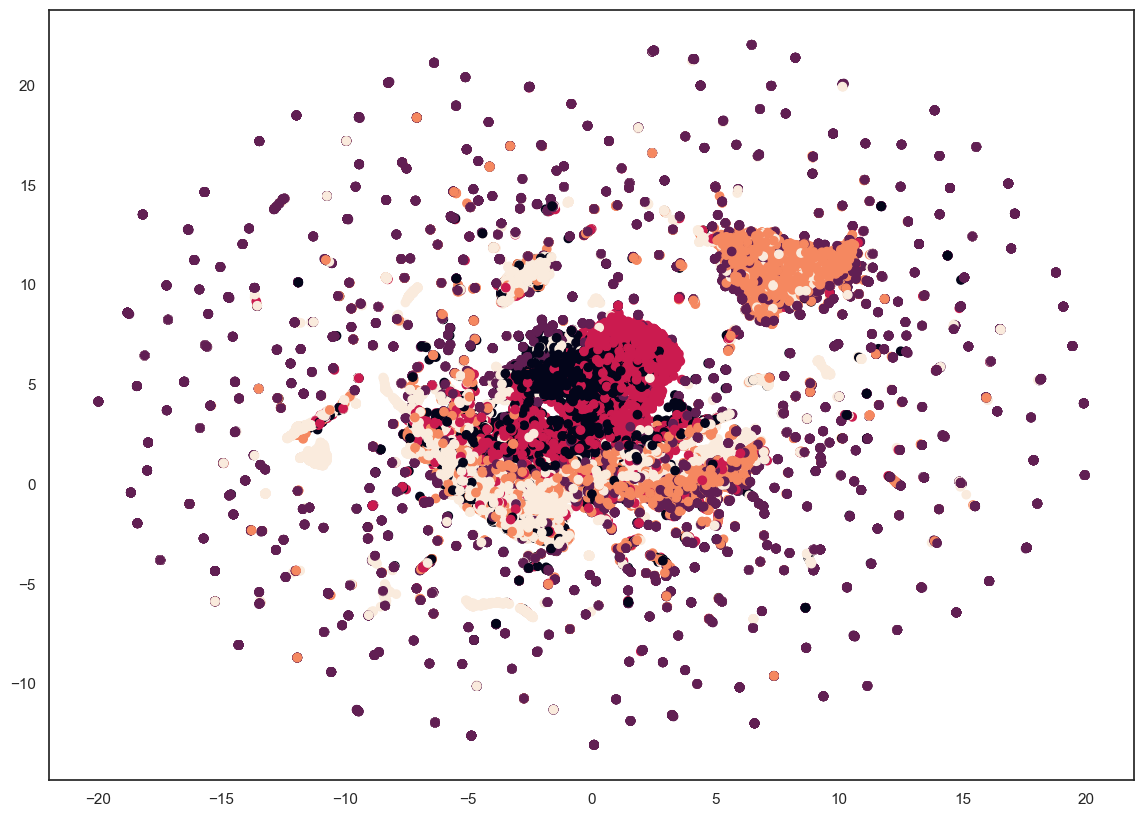

In [23]:
import umap
reducer = umap.UMAP()
embedding = reducer.fit_transform(vector_train64)
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=full_data["Train"]["labels"])

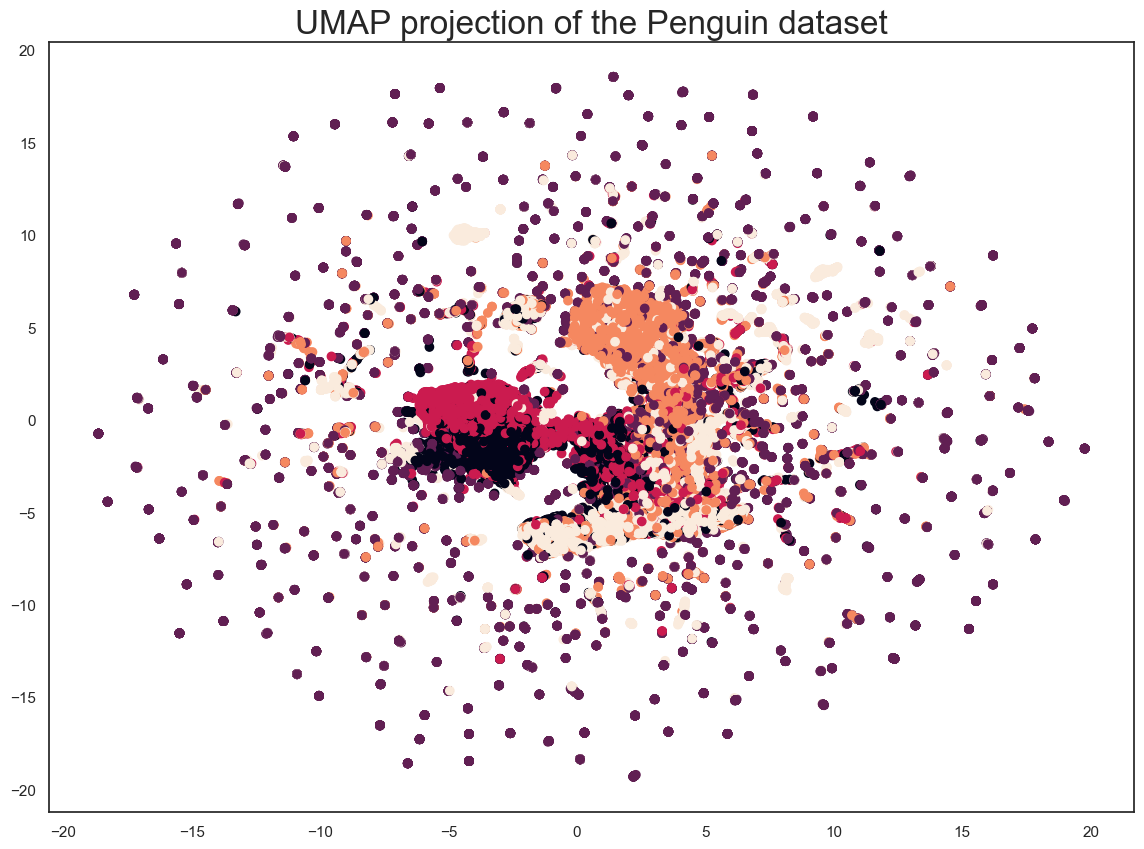

In [29]:
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=full_data["Train"]["labels"])
# plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Penguin dataset', fontsize=24);

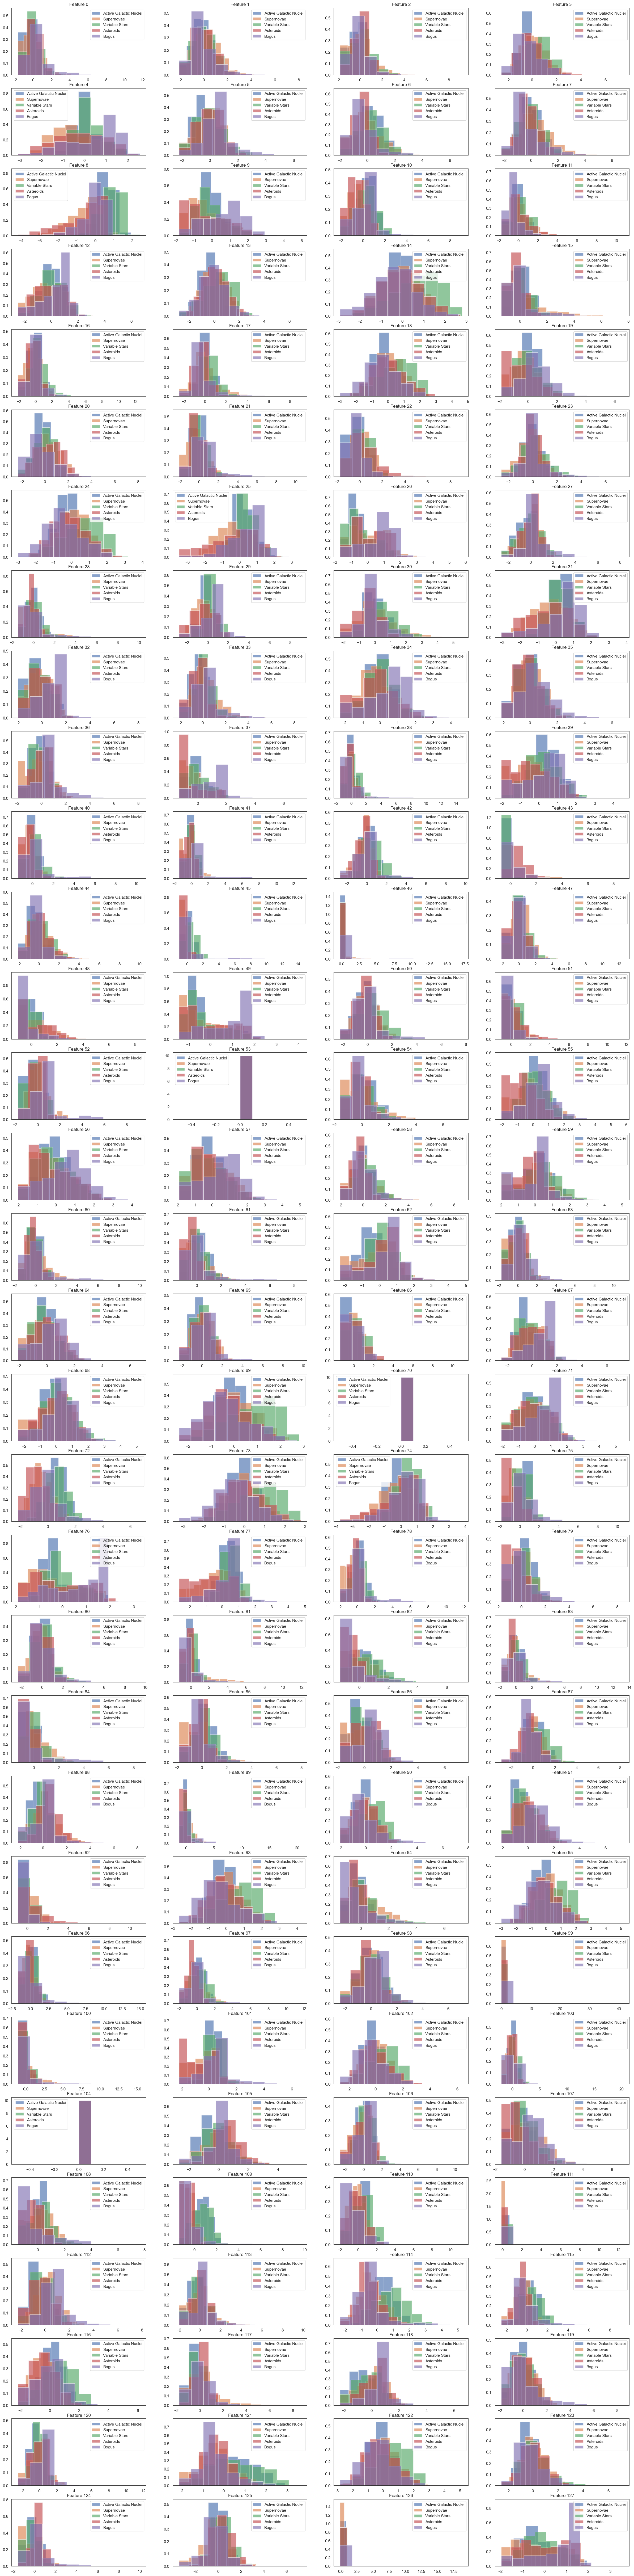

In [37]:
# duda de las clases y su correspondiente numero
fig, axes = plt.subplots(32, 4, figsize=(30, 125))
for pos, clase in enumerate(class_names):
    filtro=full_data["Train"]["labels"]==pos
    feature=0
    for k in range(32):
        for j in range(4):
            axes[k,j].hist(Vector_train[:,feature][filtro], label=clase,alpha = 0.65,density=True)
            axes[k,j].set_title(f"Feature {feature}")
            feature+=1
            
for k in range(32):
    for j in range(4):
        axes[k,j].legend()


In [ ]:
from sklearn import svm
from sklearn.preprocessing import StandardScaler

X = Vector_train
y = full_data["Train"]["labels"]

rbf_svc = svm.SVC(kernel='rbf')
rbf_svc.fit(X,y)

SVC()

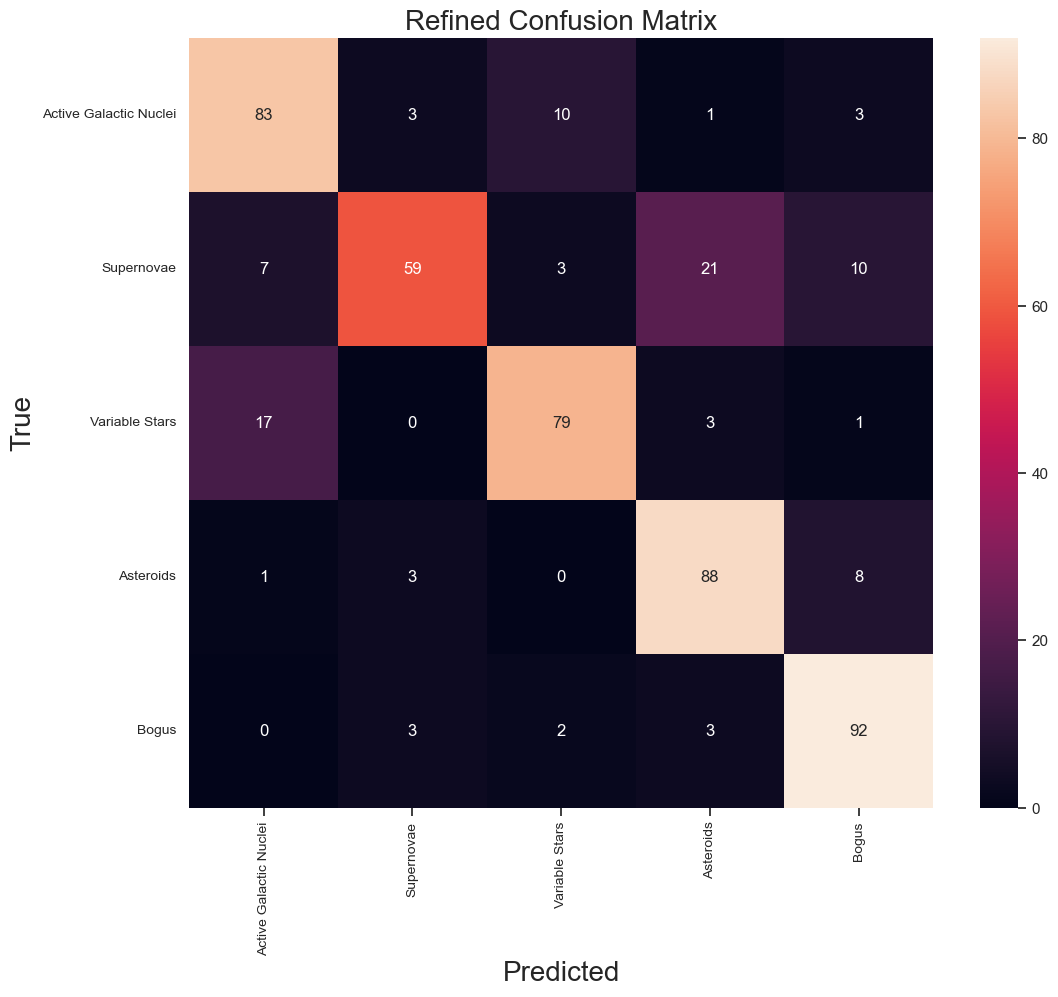

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

X_test=vector_test
predict=rbf_svc.predict(X_test)

class_prediction = predict
# https://stackoverflow.com/questions/65618137/confusion-matrix-for-multiple-classes-in-python


# labels = le.classes_
class_names =  ["Active Galactic Nuclei","Supernovae","Variable Stars","Asteroids","Bogus"]

cm = confusion_matrix(full_data["Test"]["labels"], class_prediction)
fig = plt.figure(figsize=(12, 10))
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g'); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted', fontsize=20)
ax.xaxis.set_label_position('bottom')
plt.xticks(rotation=90)
ax.xaxis.set_ticklabels(class_names, fontsize = 10)
ax.xaxis.tick_bottom()

ax.set_ylabel('True', fontsize=20)
ax.yaxis.set_ticklabels(class_names, fontsize = 10)
plt.yticks(rotation=0)

plt.title('Refined Confusion Matrix', fontsize=20)

# plt.savefig('ConMat24.png')
plt.show()